# Customer Segmentation Using K Means Clustering

Customer segmentation is a useful tool for identifying unmet customer demands. Companies can utilise this method to surpass the competition by creating products and services that are uniquely appealing.

The following are the most frequent ways that firms divide their customer base:<br>
**Demographic information**- Gender, age, marital and familial status, income, education, and employment are all examples of     demographic data.<br>
**Geographical information**- that varies based on the company's scope. This information may apply to specific towns or counties for localised companies. It might be a customer's location, state, or even nation of residency for larger firms.<br>
**behavioural data**-Spending and consumption patterns, product/service usage, and anticipated benefits are all examples of behavioural data.

## Question-1


You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID(Cus_ID), age(Age), gender(Sex), annual income(Income) and spending score(rating). You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Data Preprocessing

## Data

This project is a part of the amazon Customer Segmentation Data from Kaggle.

The dataset can be downloaded from the kaggle website.


## Environment and tools

-scikit-learn<br>
-seaborn<br>
-numpy<br>
-pandas<br>
-matplotlib

## Importing the libraries

I began by loading all of the necessary libraries and dependencies. Cus_ID,Sex,Age,Income,Rating are the columns in the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [2]:
data_set = pd.read_csv('D:\\project\\amazon_cus_seg\\amazon.csv')
data_set.head()


,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


I removed the id column because it does not appear to be important in this case. In addition, I plotted the age distribution of consumers.

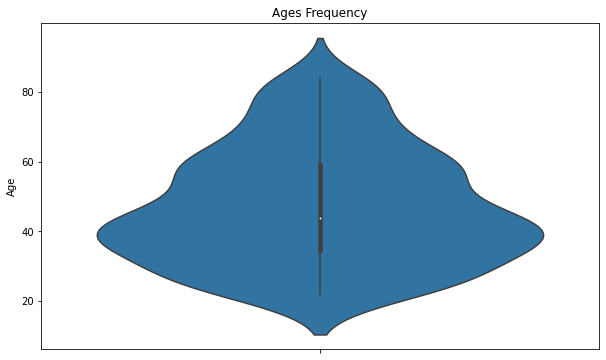

In [3]:
data_set.drop(["Cus_ID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_set["Age"])
plt.show()

To better illustrate the distribution range, I created a box plot of the expenditure score and yearly income. The yearly income range is significantly greater than the expenditure score range.

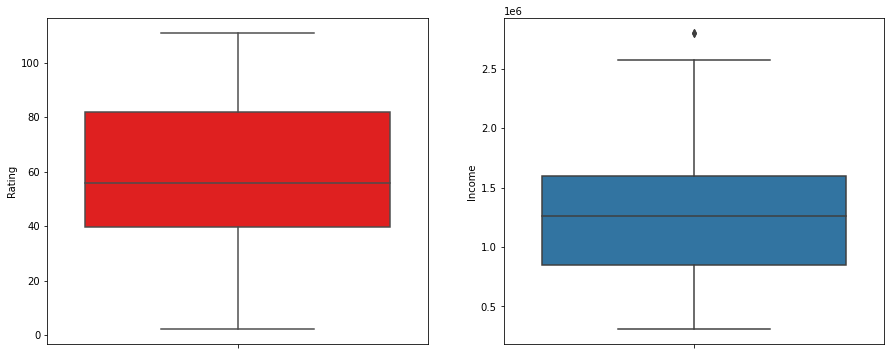

In [4]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data_set["Rating"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data_set["Income"])
plt.show()

I made a bar plot to check the distribution of male and female population in the dataset. The female population clearly outweighs the male counterpart.

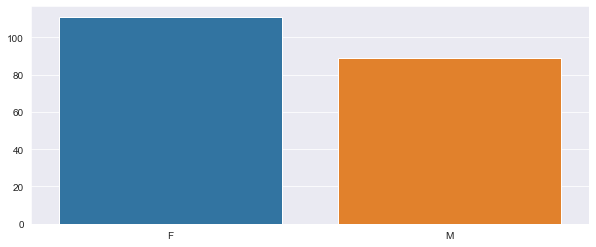

In [5]:
genders = data_set.Sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))

sns.barplot(x=genders.index, y=genders.values)
plt.show()

Next I made a bar plot to check the distribution of number of customers in each age group. Clearly the 26–35 age group outweighs every other age group.

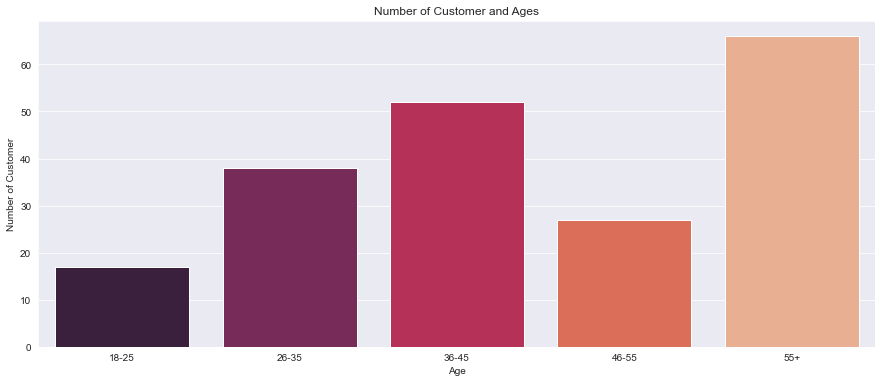

In [6]:
age18_25 = data_set.Age[(data_set.Age <= 25) & (data_set.Age >= 18)]
age26_35 = data_set.Age[(data_set.Age <= 35) & (data_set.Age >= 26)]
age36_45 = data_set.Age[(data_set.Age <= 45) & (data_set.Age >= 36)]
age46_55 = data_set.Age[(data_set.Age <= 55) & (data_set.Age >= 46)]
age55above = data_set.Age[data_set.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

I went on to make a bar graph to show the number of clients based on their spending ratings. The vast majority of consumers have a spending score of 41–60.

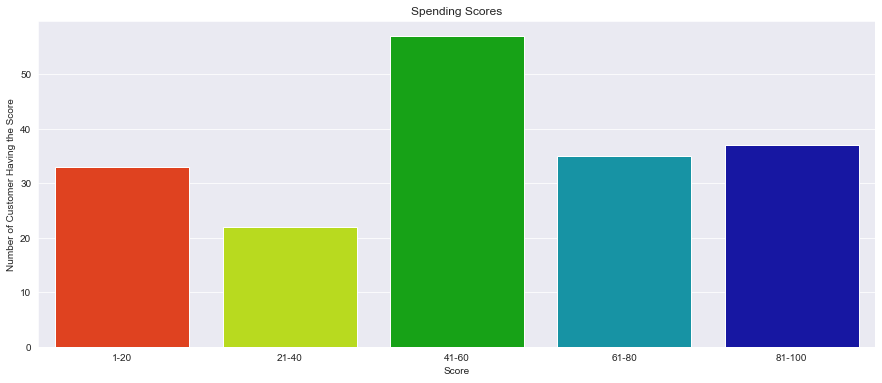

In [7]:
ss1_20 = data_set["Rating"][(data_set["Rating"] >= 1) & (data_set["Rating"] <= 20)]
ss21_40 = data_set["Rating"][(data_set["Rating"] >= 21) & (data_set["Rating"] <= 40)]
ss41_60 = data_set["Rating"][(data_set["Rating"] >= 41) & (data_set["Rating"] <= 60)]
ss61_80 = data_set["Rating"][(data_set["Rating"] >= 61) & (data_set["Rating"] <= 80)]
ss81_100 = data_set["Rating"][(data_set["Rating"] >= 81) & (data_set["Rating"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# Clustering for Income and Rating

## Taking subset of Income & Rating

In [8]:
data_set = pd.read_csv('D:\\project\\amazon_cus_seg\\amazon.csv')
data_set.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [9]:
X = data_set.iloc[:, [3, 4]].values

In [10]:
print(X)

[[ 306555      44]
 [ 306555      91]
 [ 326992       7]
 [ 326992      87]
 [ 347429      45]
 [ 347429      86]
 [ 367866       7]
 [ 367866     106]
 [ 388303       4]
 [ 388303      81]
 [ 388303      16]
 [ 388303     111]
 [ 408740      17]
 [ 408740      87]
 [ 408740      15]
 [ 408740      89]
 [ 429177      40]
 [ 429177      74]
 [ 470051      33]
 [ 470051     110]
 [ 490488      40]
 [ 490488      82]
 [ 510925       6]
 [ 510925      82]
 [ 572236      16]
 [ 572236      92]
 [ 572236      36]
 [ 572236      69]
 [ 592673      35]
 [ 592673      98]
 [ 613110       5]
 [ 613110      82]
 [ 674421       5]
 [ 674421     104]
 [ 674421      16]
 [ 674421      91]
 [ 694858      20]
 [ 694858      82]
 [ 756169      30]
 [ 756169      84]
 [ 776606      40]
 [ 776606     104]
 [ 797043      41]
 [ 797043      69]
 [ 797043      32]
 [ 797043      73]
 [ 817480      62]
 [ 817480      53]
 [ 817480      48]
 [ 817480      48]
 [ 858354      59]
 [ 858354      68]
 [ 878791   

## Optimal number of cluster via Elbow Method  for Income & Rating

Next, I calculated the ideal number of clusters by plotting Within Cluster Sum Of Squares (WCSS) versus the number of clusters (K Value). WCSS calculates the sum of observations' distances from their cluster centroids using the formula below.

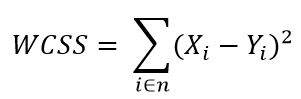

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,11):
  kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
wcss

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[57336734725495.914,
 20324240780832.9,
 9822506564414.674,
 5545882369625.054,
 3542474898530.33,
 2122388788066.3884,
 1642277443724.3494,
 1186665503971.108,
 947844635265.1279,
 737863666273.3153]

## The Elbow Method


Calculate the Within Cluster Sum of Squared Errors (WSS) for various values of k and select the k at which WSS begins to decline. This is apparent as an elbow in the WSS-versus-k figure.

Using the elbow approach, the optimal K value is discovered to be 4.

Finally, I created a plot to display the clients' spending score in relation to their yearly income. As seen in the figure, the data points are divided into 4 classes, each of which is represented by a distinct colour.

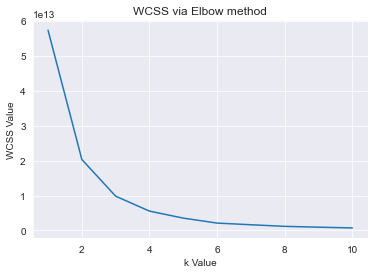

In [13]:
plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('k Value')
plt.ylabel('WCSS Value')

plt.show()

## Kmean model training

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [15]:
print(y_means)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


## Visualizing Clusters for Income & Rating

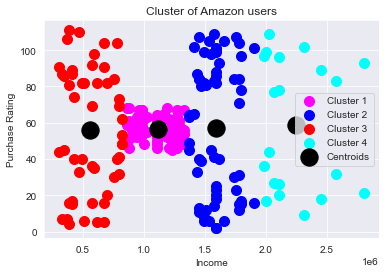

In [16]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Income')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

# For Age and Rating

## Taking subset of Income & Rating

In [17]:
Y = data_set.iloc[:, [2, 4]].values

In [18]:
print(Y)

[[ 23  44]
 [ 26  91]
 [ 24   7]
 [ 28  87]
 [ 38  45]
 [ 27  86]
 [ 42   7]
 [ 28 106]
 [ 77   4]
 [ 36  81]
 [ 81  16]
 [ 42 111]
 [ 70  17]
 [ 29  87]
 [ 45  15]
 [ 27  89]
 [ 42  40]
 [ 24  74]
 [ 63  33]
 [ 42 110]
 [ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 82  62]

## Optimal number of cluster via Elbow Method for Age & Rating

In [19]:
wcss = []

for i in range(1,11):
  kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state = 21)
  kmeans.fit(Y)
  wcss.append(kmeans.inertia_)
wcss

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[222052.5499999999,
 99753.02710997446,
 63231.50233596191,
 37917.09057387256,
 31690.202136293097,
 26011.38842221079,
 20718.25966773335,
 17475.609672637896,
 15475.134946581198,
 13645.066007187259]

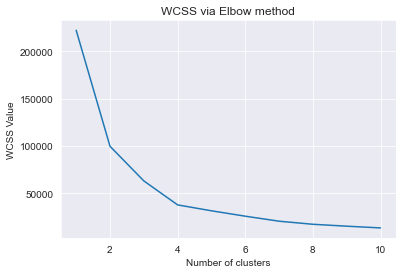

In [20]:
plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

## Kmean model training

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
x_means = kmeans.fit_predict(Y)
x_means

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

## Visualizing Clusters for Age & Rating

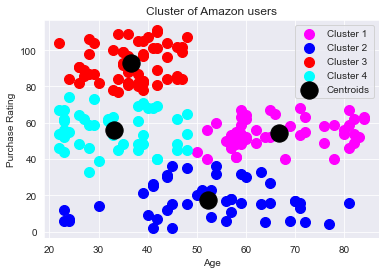

In [23]:
plt.scatter(Y[x_means == 0, 0], Y[x_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(Y[x_means == 1, 0], Y[x_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[x_means == 2, 0], Y[x_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(Y[x_means == 3, 0], Y[x_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

## Conclusions

K means clustering is one of the most prominent clustering methods, and it's generally the first thing people do when they're working on a clustering problem to get a sense of the dataset's structure. K means are used to divide data points into separate, non-overlapping groupings. One of the most common uses of K means clustering is customer segmentation in order to gain a better knowledge of them, which can then be utilised to boost the company's income.